# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

Here we have to tell what we have done

In [39]:
model = ExchangeEconomyClass()
N=75
w1A = 0.8
w2A = 0.3

x1A = np.linspace(0, 1, N+1)
x2A = np.linspace(0, 1, N+1)

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B(1-x1,1-x2) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)



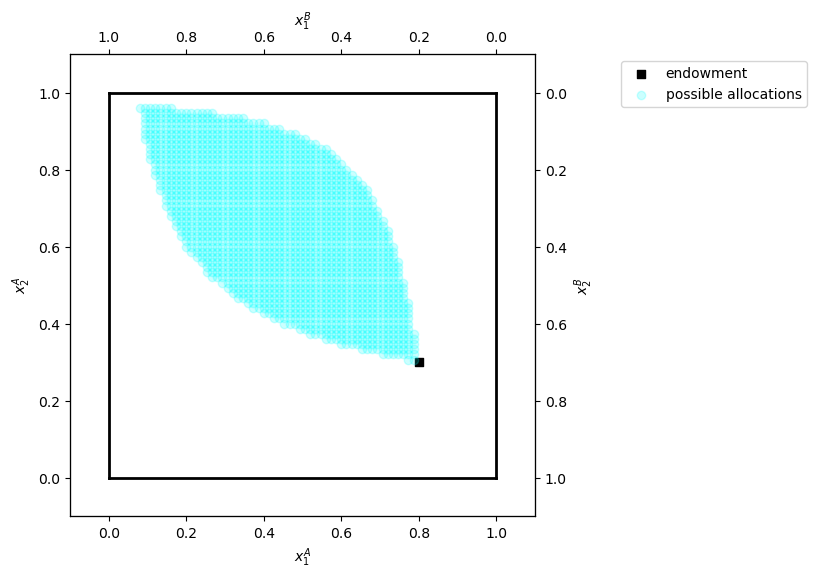

In [40]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x1possible,x2possible,marker='o',alpha=0.2,color='cyan',label='possible allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

We know that our check_market_clearing gives us two values. 
One for the first error term and one of the second error term. 

[(0.533333333333333, -0.2666666666666666), (0.47594936708860747, -0.25066666666666654), (0.42409638554216866, -0.23466666666666652), (0.3770114942528735, -0.2186666666666665), (0.334065934065934, -0.2026666666666665), (0.29473684210526296, -0.18666666666666654), (0.2585858585858585, -0.1706666666666664), (0.22524271844660176, -0.1546666666666665), (0.19439252336448576, -0.1386666666666665), (0.16576576576576557, -0.12266666666666659)]


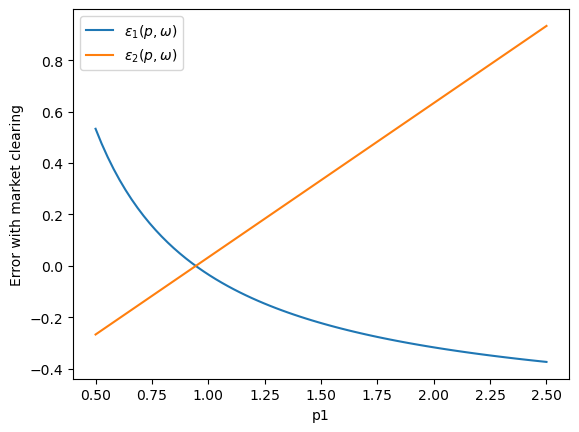

In [41]:

#We start of by making an empty list, so we can fill in the values
p1 = []
#We fill out this list by making a for loop
for t in range (N+1):
    p1.append(0.5+2*t/N)
#We do the same for the error term.
e = []
for t in p1:
    e.append(model.check_market_clearing(t))

#We print the first 10 values of the error term to check if it works
print(e[0:10])

# Extract error term 1 and error term 2 from the e list
error_term_1 = [error[0] for error in e]
error_term_2 = [error[1] for error in e]

# Plot error term 1 and error term 2
plt.plot(p1 ,error_term_1, label='$\epsilon_1(p,\omega)$')
plt.plot(p1 ,error_term_2, label='$\epsilon_2(p,\omega)$')

# Add labels and legend
plt.xlabel('p1')
plt.ylabel('Error with market clearing')
plt.legend()

# Show the plot
plt.show()



# Question 3

Explain your code and procedure

In [42]:
#First we define the error term that is closest to zero
error_term_0 = np.abs(error_term_1).argmin()

#Then we find the price that clears the market
market_clearing_p1 = p1[error_term_0]

#We print the price that clears the market
print(f'The market clearing price is p_1 = {market_clearing_p1:.2f}')



The market clearing price is p_1 = 0.95


# Question 4a.

Skriv hvad vi gør

In [43]:
#We start of by choosing -infinity as the starting point
util_A_best = -np.inf
best_allocation_p1 = None

# We will then be looping over p1, in the price vector we made in question 2
for t in p1:

    # We will secure that A ends up with a positive amount of both goods
    if 1-model.demand_B(t)[0] > 0 and 1-model.demand_B(t)[1]>0:

        # We can now calculate the utility of A
        util_A = model.utility_A(1-model.demand_B(t)[0], 1-model.demand_B(t)[1])
        
        # The if statement is now made to update util_A_best if util_A is larger
        if util_A > util_A_best:
            util_A_best = util_A
            best_allocation_p1 = t

#We print the results
print(f'She chooses the price p1 = {best_allocation_p1:.2f} so her utility is then {util_A_best:.2f}')
print(f'Therefore her allocation of the goods are: x1A = {model.demand_A(best_allocation_p1)[0]:.2f} and x2A = {model.demand_A(best_allocation_p1)[1]:.2f}')


She chooses the price p1 = 1.89 so her utility is then 0.63
Therefore her allocation of the goods are: x1A = 0.32 and x2A = 1.21


# Question 4b.

We will do the same as in question 4a. 
But now the price can take any value. 
So the new thing in 4b. is that we choose an array between 0 and 50, which are the new possible values of the price, p1. 

In [44]:
#Now the price can take any value, and not only be in p1 vector. 
#We therefore 
util_A_best_new = -np.inf
best_allocation_p1_new = []

# We will then be looping over p1, in the price vector we made in question 2
for t in np.arange(0, 50, 0.01):

    # Be sure that the good left over for A is of positive utility since negative good quantities will correspond to a utility value in complex numbers
    if 1-model.demand_B(t)[0] > 0 and 1-model.demand_B(t)[1]>0:

        # Compute the utility for the good left over for A
        util_A = model.utility_A(1-model.demand_B(t)[0], 1-model.demand_B(t)[1])
        
        # Update util_A_best if ua is of higher value
        if util_A > util_A_best_new:
            util_A_best_new = util_A
            best_allocation_p1_new = t

print(f'She chooses the price p1 = {best_allocation_p1_new:.2f} so her utility is then {util_A_best_new:.2f}')
print(f'Therefore her allocation of the goods are: x1A = {model.demand_A(best_allocation_p1_new)[0]:.2f} and x2A = {model.demand_A(best_allocation_p1_new)[1]:.2f}')


She chooses the price p1 = 1.90 so her utility is then 0.63
Therefore her allocation of the goods are: x1A = 0.32 and x2A = 1.21


/Users/timboetius/Desktop/Python/GitMappe/Assignment-1/projects-2024-tummeren-olli/inauguralproject/inauguralproject.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  x1B = self.par.beta*((p1*(1-self.par.w1A)+(1-self.par.w2A))/p1)


We see that the allocantion that she ends up with is nearly identical as the one she gets, if the price only can be chosen from p1. 

# Question 5a.

In [46]:

util_A_better = -np.inf
x_1_op = -np.inf
x_2_op = -np.inf
for x_1 in x1possible:
    for x_2 in x2possible:
          util_A_start = model.utility_A(x_1,x_2)
    if model.utility_A(x_1,x_2) > util_A_better and model.utility_B(1-x_1,1-x_2) >= model.utility_B(1-0.8,1-0.3):
            util_A_better = util_A_start
            x_1_op = x_1 
            x_2_op = x_2


print(f'Utility A max = {util_A_better:.3f}: (x1A,x2A) = ({x_1_op:.3f},{x_2_op:.3f})')
print(f'Utility B max = {model.utility_B(1-x_1_op,1-x_2_op):.3f}: (x1B,x2B) = ({1-x_1_op:.3f},{1-x_2_op:.3f})')


Utility A max = 0.479: (x1A,x2A) = (0.787,0.373)
Utility B max = 0.306: (x1B,x2B) = (0.213,0.627)
